<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 5 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Optimisez la gestion des données d'une boutique avec Python
</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
# Importation des fichiers
data_liaison = pd.read_csv('Fichier_liaison.csv',sep=",")
data_erp= pd.read_csv('Fichier_erp.csv',sep=",")
data_web = pd.read_csv('Fichier_web.csv', sep=",")

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier liaison</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(data_liaison.shape[0]))
print("Le tableau comporte {} colonne(s)".format(data_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [4]:
#La nature des données dans chacune des colonnes
Nature_des_donnees_par_colonne = data_liaison.dtypes

print("Nature des données par colonne :\n", Nature_des_donnees_par_colonne)

Nature des données par colonne :
 product_id     int64
id_web        object
dtype: object


In [5]:
#Modification du type product_id car donnée qualitative
data_liaison['product_id']=data_liaison['product_id'].astype(object)
Nature_des_donnees_par_colonne = data_liaison.dtypes
print("Nature des données par colonne :\n", Nature_des_donnees_par_colonne)

Nature des données par colonne :
 product_id    object
id_web        object
dtype: object


In [6]:
#On vérifie si les valeurs sont uniques
data_liaison.nunique()

product_id    825
id_web        734
dtype: int64

<h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut voir que product_id à bien 825 valeurs uniques mais id_web en a seulement 734 </h3>
</div>

In [7]:
#Le nombre de valeurs présentes dans chacune des colonnes
Nombre_de_valeurs = data_liaison.count()
print ("Nombre de valeurs par colonne :\n", Nombre_de_valeurs)

Nombre de valeurs par colonne :
 product_id    825
id_web        734
dtype: int64


In [8]:
#On vérifie si il y a des valeurs null
data_liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [9]:
#On vérifie si il y a des valeurs dupliqués 
data_liaison.duplicated().sum()

0

  <h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut en déduire que la clé product_id n'a pas de doublon mais que tous les product_id ne sont pas reliés à un id_web</h3>
</div>

In [10]:
data_liaison=data_liaison.loc[data_liaison['id_web'].notnull()]

In [11]:
#On modifie le nom de la colonne "id_web" en "sku" pour être similaire au fichier web
data_liaison=data_liaison.rename(columns={'id_web':'sku'})

In [12]:
#On vérifie que la colonne 'sku' ne contient que des chiffres
sku_avec_des_letters = data_liaison[data_liaison['sku'].str.contains(r'[a-zA-Z]')]
print(sku_avec_des_letters)

    product_id                  sku
443       4954  bon-cadeau-25-euros


  <h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut voir qu'il y a un product_id qui est relié à un bon de cadeau. On le garde car il peut être quand même utile </h3>
</div>

In [13]:
#Affichage les 5 premières lignes de la table
data_liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier erp</h3>
</div>

In [14]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(data_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(data_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 5 colonne(s)


In [15]:
#La nature des données dans chacune des colonnes
Nature_des_donnees_par_colonne_erp = data_erp.dtypes

print("Nature des données par colonne :\n", Nature_des_donnees_par_colonne_erp)

Nature des données par colonne :
 product_id         int64
onsale_web         int64
price             object
stock_quantity     int64
stock_status      object
dtype: object


In [16]:
#Modification du type product_id car donnée qualitative
data_erp['product_id'] = data_erp['product_id'].astype(object)

#Modification du type price car donnée quantitative
data_erp['price'] = data_erp['price'].str.replace(',', '.')
data_erp['price'] = data_erp['price'].astype(float)

Nature_des_donnees_par_colonne_erp = data_erp.dtypes
print("Nature des données par colonne :\n", Nature_des_donnees_par_colonne_erp)

Nature des données par colonne :
 product_id         object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object


In [17]:
#Le nombre de valeurs présentes dans chacune des colonnes
Nombre_de_valeurs = data_erp.count()
print ("Nombre de valeurs par colonne :\n", Nombre_de_valeurs)

Nombre de valeurs par colonne :
 product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64


  <h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut voir qu'il n y a aucune valeur manquante</h3>
</div>

In [18]:
#On vérifie si les valeurs sont uniques
data_erp.nunique()

product_id        825
onsale_web          2
price             382
stock_quantity    129
stock_status        2
dtype: int64

<h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut voir que product_id à bien 825 valeurs uniques </h3>
</div>

In [19]:
#On vérifie si il y a des valeurs null
data_erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [20]:
#On vérifie si il y a des valeurs dupliqués 
data_erp.duplicated().sum()

0

In [21]:
#On regarde la description du dataframe entier 
data_erp.describe(include='all')

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.0,825.000000,825.000000,825.000000,825
unique,825.0,NaN,NaN,NaN,2
top,3847.0,NaN,NaN,NaN,instock
freq,1.0,NaN,NaN,NaN,638
mean,NaN,0.869091,32.384000,26.583030,NaN
std,NaN,0.337506,26.832271,45.875948,NaN
min,NaN,0.000000,-8.000000,-1.000000,NaN
25%,NaN,1.000000,14.600000,1.000000,NaN
50%,NaN,1.000000,24.400000,11.000000,NaN
75%,NaN,1.000000,42.000000,34.000000,NaN


In [22]:
#On filtre les lignes où la colonne "price" est inférieure à zéro
negative_price = data_erp[data_erp["price"] < 0]
print(negative_price)

    product_id  onsale_web  price  stock_quantity stock_status
469       5017           0   -8.0               0   outofstock
739       6594           0   -1.0             192      instock


<h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut voir qu'il y a deux produits qui ont un prix inférieur à 0. Ces valeurs sont incohérentes. Nous gardons ces lignes de côté pour pouvoir les analyser plus tard </h3>
</div>

In [23]:
#On filtre les lignes où la colonne "stock_quantity" est inférieure à zéro
negative_stock_quantity = data_erp[data_erp["stock_quantity"] < 0]
print(negative_stock_quantity)

    product_id  onsale_web  price  stock_quantity stock_status
449       4973           0   10.0              -1   outofstock
573       5700           1   44.5              -1   outofstock


<h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut voir qu'il y a deux produits qui ont un stock inférieur à 0. Ceci est une incohérence. Nous gardons ces lignes de côté pour pouvoir les analyser plus tard </h3>
</div>

In [24]:
#On vérifie si il n y a pas d'incohérence dans les stocks outofstock
positive_stock_outstock = data_erp[(data_erp['stock_quantity'] > 0) & (data_erp[ 'stock_status'] == 'outofstock')]
print(positive_stock_outstock)

    product_id  onsale_web  price  stock_quantity stock_status
19        4055           0   86.1               1   outofstock
49        4090           0   73.0               6   outofstock
50        4092           0   47.0               6   outofstock
630       5826           1   41.2              12   outofstock
696       6125           0   14.2              48   outofstock


<h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut voir qu'il y a des produits en stock mais dont le statut est outofstock. Cela est incohérent. Nous gardons ces lignes de côté pour pouvoir les analyser plus tard</h3>
</div>

In [25]:
#On vérifie si il n y a pas d'incohérence dans les stocks instock
negative_stock_instock = data_erp[(data_erp['stock_quantity'] <= 0) & (data_erp[ 'stock_status'] == 'instock')]
print(negative_stock_instock)

    product_id  onsale_web  price  stock_quantity stock_status
443       4954           1   25.0               0      instock


<h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut voir qu'il y a un produit qui n'est pas en stock mais dont le statut est instock. Cela est incohérent. Nous gardons cette ligne de côté pour pouvoir les analyser plus tard</h3>
</div>

In [26]:
#Affichage les 5 premières lignes de la table
data_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier web</h3>
</div>

In [27]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(data_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(data_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 28 colonne(s)


In [28]:
#La nature des données dans chacune des colonnes
Nature_des_donnees_par_colonne = data_web.dtypes

print("Nature des données par colonne :\n", Nature_des_donnees_par_colonne)

Nature des données par colonne :
 sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64
dtype: object


In [29]:
#Le nombre de valeurs présentes dans chacune des colonnes
Nombre_de_valeurs = data_web.count()
print ("Nombre de valeurs par colonne :\n", Nombre_de_valeurs)

Nombre de valeurs par colonne :
 sku                      1428
virtual                  1513
downloadable             1513
rating_count             1513
average_rating           1430
total_sales              1430
tax_status                716
tax_class                   0
post_author              1430
post_date                1430
post_date_gmt            1430
post_content                0
post_title               1430
post_excerpt              716
post_status              1430
comment_status           1430
ping_status              1430
post_password               0
post_name                1430
post_modified            1430
post_modified_gmt        1430
post_content_filtered       0
post_parent              1430
guid                     1430
menu_order               1430
post_type                1430
post_mime_type            714
comment_count            1430
dtype: int64


In [30]:
#On vérifie si il y a des valeurs null
data_web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [31]:
#On vérifie si les valeurs sont uniques
data_web.nunique()

sku                       714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                41
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1429
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64

In [32]:
#On vérifie si il y a des valeurs dupliqués 
data_web.duplicated().sum()

82

In [33]:
#On affiche les valeurs dupliqués
duplique = data_web[data_web.duplicated()]
duplique

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
17,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1448,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#On supprime les données dupliquées car elles ne sont pas utiles
data_web = data_web.drop_duplicates()

In [35]:
#On verifie que les données dupliquées ont bien été supprimées 
data_web.duplicated().sum()

0

In [36]:
#On supprime la ligne 1 qui ne contient aucune information
data_web=data_web.drop(1)
data_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [37]:
#On met à jour l'index
data_web=data_web.reset_index(drop=True)
data_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [38]:
#On affiche à nouveau les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(data_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(data_web.shape[1]))

Le tableau comporte 1430 observation(s) ou article(s)
Le tableau comporte 28 colonne(s)


In [39]:
#On regarde le nombre de NaN par colonne
data_web.isna().sum()

sku                         2
virtual                     0
downloadable                0
rating_count                0
average_rating              0
total_sales                 0
tax_status                714
tax_class                1430
post_author                 0
post_date                   0
post_date_gmt               0
post_content             1430
post_title                  0
post_excerpt              714
post_status                 0
comment_status              0
ping_status                 0
post_password            1430
post_name                   0
post_modified               0
post_modified_gmt           0
post_content_filtered    1430
post_parent                 0
guid                        0
menu_order                  0
post_type                   0
post_mime_type            716
comment_count               0
dtype: int64

<h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut voir que les colonnes "tax_class", "post_content", "post_password" et "post_content_filtered" ont 1431 NaN donc la totalité de leurs lignes</h3>
</div>

In [40]:
#On supprime les colonne "tax_class", "post_content", "post_password" et "post_content_filtered"
data_web=data_web.drop(columns=['tax_class', 'post_content','post_password','post_content_filtered'])

In [41]:
#On compte le nombre de zero par colonne 
zero_par_colonne = (data_web == 0).sum(axis=0)
print(zero_par_colonne)

sku                     0
virtual              1430
downloadable         1430
rating_count         1430
average_rating       1430
total_sales           658
tax_status              0
post_author             0
post_date               0
post_date_gmt           0
post_title              0
post_excerpt            0
post_status             0
comment_status          0
ping_status             0
post_name               0
post_modified           0
post_modified_gmt       0
post_parent          1430
guid                    0
menu_order           1430
post_type               0
post_mime_type          0
comment_count        1430
dtype: int64


<h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut voir que les colonnes "virtual", "downloadable", "rating_count", "average_rating", "post_parent", "menu_order" et "comment_count" ne contiennent que des 0</h3>
</div>

In [42]:
#On supprime les colonne "virtual", "downloadable", "rating_count", "average_rating", "post_parent", "menu_order" et "comment_count"
data_web=data_web.drop(columns=['virtual', 'downloadable','rating_count','average_rating', 'post_parent', 'menu_order', 'comment_count' ])

In [43]:
#On regarde à quoi correspondent les post_type "attachment"
data_web.loc[data_web['post_type'] == "attachment"]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,16004,5.0,NaN,2.0,2018-06-07 16:27:25,2018-06-07 14:27:25,Château du Couvent Pomerol 2017,NaN,publish,closed,closed,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
3,15763,1.0,NaN,2.0,2020-01-25 14:08:16,2020-01-25 13:08:16,Domaine de la Monardière Vacqueyras Vieilles V...,NaN,publish,closed,closed,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
6,15740,0.0,NaN,2.0,2020-04-25 12:32:17,2020-04-25 10:32:17,Château Jean Faure Saint-Emilion Grand Cru 2015,NaN,publish,closed,closed,jean-faure-saint-emilion-grand-cru-2015,2020-08-27 11:35:02,2020-08-27 09:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
7,14253,0.0,NaN,2.0,2018-02-20 15:29:32,2018-02-20 14:29:32,Domaine Huet Vouvray Haut-Lieu Sec 2017,NaN,publish,closed,closed,domaine-huet-vouvray-haut-lieu-sec-2016,2020-07-22 09:55:01,2020-07-22 07:55:01,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
10,16146,3.0,NaN,2.0,2018-10-09 17:08:52,2018-10-09 15:08:52,Château de la Selve Coteaux de l'Ardèche Blanc...,NaN,publish,closed,closed,chateau-de-la-selve-igp-coteaux-de-lardeche-st...,2020-08-25 15:25:03,2020-08-25 13:25:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,15949,1.0,NaN,2.0,2018-02-28 16:37:33,2018-02-28 15:37:33,Domaine de l'Idylle Roussette de Savoie Anne d...,NaN,publish,closed,closed,domaine-de-lidylle-savoie-roussette-2018,2020-06-02 16:55:03,2020-06-02 14:55:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1423,7033,4.0,NaN,2.0,2019-03-13 13:44:44,2019-03-13 12:44:44,Huile d'Olive Extra Vierge Planeta Selezione C...,NaN,publish,closed,closed,huile-olive-planeta-3l,2020-08-27 14:55:02,2020-08-27 12:55:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1425,12881,2.0,NaN,2.0,2019-03-28 15:25:14,2019-03-28 14:25:14,Domaine de Montbourgeau L'Etoile Vin Jaune 2009,NaN,publish,closed,closed,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1428,38,38.0,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,NaN,publish,closed,closed,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg


<h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut voir que les post_type "attachment" sont tous des image/jpeg et donc non des produits</h3>
</div>

In [44]:
#On supprime les "attachment"
data_web.drop(data_web[data_web['post_type'] == "attachment" ].index, inplace=True)
data_web

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
1,15075,3.0,taxable,2.0,2018-02-14 15:39:43,2018-02-14 14:39:43,Parés Baltà Penedès Indigena 2017,Des couleurs et aromes intenses où le fruit et...,publish,closed,closed,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
2,16209,6.0,taxable,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
4,13895,0.0,taxable,2.0,2019-03-19 10:41:50,2019-03-19 09:41:50,Château Saransot-Dupré Bordeaux Blanc 2016,"<span style=""display: inline !important; float...",publish,closed,closed,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
5,12857,0.0,taxable,2.0,2018-04-12 17:56:13,2018-04-12 15:56:13,Château de Meursault Puligny-Montrachet 1er Cr...,Il présente une grande fraîcheur minérale au n...,publish,closed,closed,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
8,14106,0.0,taxable,2.0,2019-06-08 09:54:21,2019-06-08 07:54:21,Stéphane Tissot Château-Chalon 2011,Ce vin peut-être dégusté sur sa jeunesse mais ...,publish,closed,closed,stephane-tissot-chateau-chalon-2011,2020-05-29 17:35:03,2020-05-29 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,15941,4.0,taxable,2.0,2018-02-12 14:26:52,2018-02-12 13:26:52,Domaine de la Jérôme Côtes du Rhône Village 201,"Un vin opulent, à la texture onctueuse, et tou...",publish,closed,closed,jerome-cotes-du-rhone-2018,2020-06-25 14:00:03,2020-06-25 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1420,10459,0.0,taxable,2.0,2018-04-13 15:58:19,2018-04-13 13:58:19,Alphonse Mellot Sancerre Rouge Génération XIX ...,"Robe d'un superbe rubis, dense et profond - As...",publish,closed,closed,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1424,16320,3.0,taxable,2.0,2018-02-12 12:49:29,2018-02-12 11:49:29,Mourgues du Grès IGP Pont du Gard Terre d'Arge...,"Magnifique exemple d’assemblage réussi, ou cha...",publish,closed,closed,mourgues-du-gres-costieres-de-nimes-terre-darg...,2020-08-25 11:15:03,2020-08-25 09:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1426,15663,3.0,taxable,2.0,2018-02-27 10:27:01,2018-02-27 09:27:01,Chermette Domaine du Vissoux Brouilly Pierreux...,Le Brouilly est le plus méridional des crus du...,publish,closed,closed,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


<h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut voir que la colonne "post_mime_type" ne compte que des NaN</h3>
</div>

In [45]:
#On supprime la colonne "post_mime_type"
data_web=data_web.drop(columns=['post_mime_type'])

In [46]:
#On affiche à nouveau les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(data_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(data_web.shape[1]))

Le tableau comporte 716 observation(s) ou article(s)
Le tableau comporte 16 colonne(s)


In [47]:
#Le nombre de valeurs présentes dans chacune des colonnes
Nombre_de_valeurs = data_web.count()
print ("Nombre de valeurs par colonne :\n", Nombre_de_valeurs)

Nombre de valeurs par colonne :
 sku                  714
total_sales          716
tax_status           716
post_author          716
post_date            716
post_date_gmt        716
post_title           716
post_excerpt         716
post_status          716
comment_status       716
ping_status          716
post_name            716
post_modified        716
post_modified_gmt    716
guid                 716
post_type            716
dtype: int64


In [48]:
data_web.isnull().sum()

sku                  2
total_sales          0
tax_status           0
post_author          0
post_date            0
post_date_gmt        0
post_title           0
post_excerpt         0
post_status          0
comment_status       0
ping_status          0
post_name            0
post_modified        0
post_modified_gmt    0
guid                 0
post_type            0
dtype: int64

<h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut voir que la colonne "sku" contient 2 valeurs nulles</h3>
</div>

In [49]:
#On regarde les valeurs nulles de la colonne "sku"
lignes_nulles_sku_data_web = data_web[data_web['sku'].isnull()]
lignes_nulles_sku_data_web

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
336,NaN,3.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product
463,NaN,10.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product


<h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#Ces lignes comportent des informations. Nous allons donc les garder dans le df lignes_nulles_sku_data_web pour pouvoir les relier plus tard. Nous les supprimons du df data_web</h3>
</div>

In [50]:
#Suppression des lignes sku nulles
data_web=data_web.loc[data_web['sku'].notnull()]

In [51]:
#On vérifie que la colonne 'sku' ne contient que des chiffres
sku_avec_des_letters_web = data_web[data_web['sku'].str.contains(r'[a-zA-Z]')]
print(sku_avec_des_letters_web)

                     sku  total_sales tax_status  post_author  \
187  bon-cadeau-25-euros         10.0    taxable          1.0   

               post_date        post_date_gmt         post_title  \
187  2018-06-01 13:53:46  2018-06-01 11:53:46  Bon cadeau de 25€   

                                          post_excerpt post_status  \
187  <span style="color: #a85253;"><strong>Parlons ...     publish   

    comment_status ping_status               post_name        post_modified  \
187         closed      closed  bon-cadeau-de-25-euros  2018-06-01 14:13:57   

       post_modified_gmt                                               guid  \
187  2018-06-01 12:13:57  https://www.bottle-neck.fr/?post_type=product&...   

    post_type  
187   product  


<h3 style="margin: auto; padding: 0px; color: RGB(0,150,250); font-style: italic; font-size: medium;">#On peut voir comme précédement qu'un sku se nomme bon cadeau 25€, on le garde également car il peut être utile</h3>
</div>

In [52]:
#Affichage les 5 premières lignes de la table
data_web.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
1,15075,3.0,taxable,2.0,2018-02-14 15:39:43,2018-02-14 14:39:43,Parés Baltà Penedès Indigena 2017,Des couleurs et aromes intenses où le fruit et...,publish,closed,closed,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
2,16209,6.0,taxable,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,13895,0.0,taxable,2.0,2019-03-19 10:41:50,2019-03-19 09:41:50,Château Saransot-Dupré Bordeaux Blanc 2016,"<span style=""display: inline !important; float...",publish,closed,closed,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,https://www.bottle-neck.fr/?post_type=product&...,product
5,12857,0.0,taxable,2.0,2018-04-12 17:56:13,2018-04-12 15:56:13,Château de Meursault Puligny-Montrachet 1er Cr...,Il présente une grande fraîcheur minérale au n...,publish,closed,closed,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
8,14106,0.0,taxable,2.0,2019-06-08 09:54:21,2019-06-08 07:54:21,Stéphane Tissot Château-Chalon 2011,Ce vin peut-être dégusté sur sa jeunesse mais ...,publish,closed,closed,stephane-tissot-chateau-chalon-2011,2020-05-29 17:35:03,2020-05-29 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Rapprochement des deux bases data_erp et data_web</h2>
</div>

In [53]:
# On fait une jointure de data_erp et data_liaison dans un premier dataframe 
df_1 = data_erp.merge(data_liaison,on='product_id')
df_1

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,15891
730,7025,1,69.0,2,instock,15887
731,7247,1,54.8,23,instock,13127-1
732,7329,0,26.5,14,instock,14680-1


In [54]:
# On fait une seconde jointure du premier dataframe avec data_web.
data_stock = df_1.merge(data_web, on='sku', how='right')
data_stock

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,tax_status,post_author,post_date,...,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,4165,1,12.0,57,instock,15075,3.0,taxable,2.0,2018-02-14 15:39:43,...,Parés Baltà Penedès Indigena 2017,Des couleurs et aromes intenses où le fruit et...,publish,closed,closed,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
1,4174,1,5.7,94,instock,16209,6.0,taxable,2.0,2018-02-14 17:15:31,...,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,https://www.bottle-neck.fr/?post_type=product&...,product
2,5796,1,12.5,12,instock,13895,0.0,taxable,2.0,2019-03-19 10:41:50,...,Château Saransot-Dupré Bordeaux Blanc 2016,"<span style=""display: inline !important; float...",publish,closed,closed,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,https://www.bottle-neck.fr/?post_type=product&...,product
3,4582,1,109.6,7,instock,12857,0.0,taxable,2.0,2018-04-12 17:56:13,...,Château de Meursault Puligny-Montrachet 1er Cr...,Il présente une grande fraîcheur minérale au n...,publish,closed,closed,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
4,6106,1,74.8,15,instock,14106,0.0,taxable,2.0,2019-06-08 09:54:21,...,Stéphane Tissot Château-Chalon 2011,Ce vin peut-être dégusté sur sa jeunesse mais ...,publish,closed,closed,stephane-tissot-chateau-chalon-2011,2020-05-29 17:35:03,2020-05-29 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,4074,1,12.7,50,instock,15941,4.0,taxable,2.0,2018-02-12 14:26:52,...,Domaine de la Jérôme Côtes du Rhône Village 201,"Un vin opulent, à la texture onctueuse, et tou...",publish,closed,closed,jerome-cotes-du-rhone-2018,2020-06-25 14:00:03,2020-06-25 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,product
710,4617,1,67.5,1,instock,10459,0.0,taxable,2.0,2018-04-13 15:58:19,...,Alphonse Mellot Sancerre Rouge Génération XIX ...,"Robe d'un superbe rubis, dense et profond - As...",publish,closed,closed,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,https://www.bottle-neck.fr/?post_type=product&...,product
711,4062,1,11.9,60,instock,16320,3.0,taxable,2.0,2018-02-12 12:49:29,...,Mourgues du Grès IGP Pont du Gard Terre d'Arge...,"Magnifique exemple d’assemblage réussi, ou cha...",publish,closed,closed,mourgues-du-gres-costieres-de-nimes-terre-darg...,2020-08-25 11:15:03,2020-08-25 09:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
712,4262,1,15.8,35,instock,15663,3.0,taxable,2.0,2018-02-27 10:27:01,...,Chermette Domaine du Vissoux Brouilly Pierreux...,Le Brouilly est le plus méridional des crus du...,publish,closed,closed,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,https://www.bottle-neck.fr/?post_type=product&...,product


In [55]:
#On affiche les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(data_stock.shape[0]))
print("Le tableau comporte {} colonne(s)".format(data_stock.shape[1]))

Le tableau comporte 714 observation(s) ou article(s)
Le tableau comporte 21 colonne(s)


In [56]:
#Le nombre de valeurs présentes dans chacune des colonnes
Nombre_de_valeurs_data_stock = data_stock.count()
print ("Nombre de valeurs par colonne :\n", Nombre_de_valeurs_data_stock)

Nombre de valeurs par colonne :
 product_id           714
onsale_web           714
price                714
stock_quantity       714
stock_status         714
sku                  714
total_sales          714
tax_status           714
post_author          714
post_date            714
post_date_gmt        714
post_title           714
post_excerpt         714
post_status          714
comment_status       714
ping_status          714
post_name            714
post_modified        714
post_modified_gmt    714
guid                 714
post_type            714
dtype: int64


In [57]:
#On vérifie si il y a des valeurs nulles
data_stock.isnull().sum()

product_id           0
onsale_web           0
price                0
stock_quantity       0
stock_status         0
sku                  0
total_sales          0
tax_status           0
post_author          0
post_date            0
post_date_gmt        0
post_title           0
post_excerpt         0
post_status          0
comment_status       0
ping_status          0
post_name            0
post_modified        0
post_modified_gmt    0
guid                 0
post_type            0
dtype: int64

In [58]:
#On vérifie si il y a des valeurs dupliqués 
data_stock.duplicated().sum()

0

In [59]:
data_stock.describe()

,onsale_web,price,stock_quantity,total_sales,post_author
count,714.0,714.000000,714.000000,714.000000,714.000000
mean,1.0,32.493137,28.761905,4.012605,1.998599
std,0.0,27.810525,48.005486,8.518183,0.037424
min,1.0,5.200000,-1.000000,0.000000,1.000000
25%,1.0,14.100000,2.000000,0.000000,2.000000
50%,1.0,23.550000,12.000000,1.000000,2.000000
75%,1.0,42.175000,35.000000,4.000000,2.000000
max,1.0,225.000000,578.000000,96.000000,2.000000


In [60]:
#On affiche le dataframe data_stock
data_stock

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,tax_status,post_author,post_date,...,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,4165,1,12.0,57,instock,15075,3.0,taxable,2.0,2018-02-14 15:39:43,...,Parés Baltà Penedès Indigena 2017,Des couleurs et aromes intenses où le fruit et...,publish,closed,closed,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
1,4174,1,5.7,94,instock,16209,6.0,taxable,2.0,2018-02-14 17:15:31,...,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,https://www.bottle-neck.fr/?post_type=product&...,product
2,5796,1,12.5,12,instock,13895,0.0,taxable,2.0,2019-03-19 10:41:50,...,Château Saransot-Dupré Bordeaux Blanc 2016,"<span style=""display: inline !important; float...",publish,closed,closed,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,https://www.bottle-neck.fr/?post_type=product&...,product
3,4582,1,109.6,7,instock,12857,0.0,taxable,2.0,2018-04-12 17:56:13,...,Château de Meursault Puligny-Montrachet 1er Cr...,Il présente une grande fraîcheur minérale au n...,publish,closed,closed,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
4,6106,1,74.8,15,instock,14106,0.0,taxable,2.0,2019-06-08 09:54:21,...,Stéphane Tissot Château-Chalon 2011,Ce vin peut-être dégusté sur sa jeunesse mais ...,publish,closed,closed,stephane-tissot-chateau-chalon-2011,2020-05-29 17:35:03,2020-05-29 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,4074,1,12.7,50,instock,15941,4.0,taxable,2.0,2018-02-12 14:26:52,...,Domaine de la Jérôme Côtes du Rhône Village 201,"Un vin opulent, à la texture onctueuse, et tou...",publish,closed,closed,jerome-cotes-du-rhone-2018,2020-06-25 14:00:03,2020-06-25 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,product
710,4617,1,67.5,1,instock,10459,0.0,taxable,2.0,2018-04-13 15:58:19,...,Alphonse Mellot Sancerre Rouge Génération XIX ...,"Robe d'un superbe rubis, dense et profond - As...",publish,closed,closed,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,https://www.bottle-neck.fr/?post_type=product&...,product
711,4062,1,11.9,60,instock,16320,3.0,taxable,2.0,2018-02-12 12:49:29,...,Mourgues du Grès IGP Pont du Gard Terre d'Arge...,"Magnifique exemple d’assemblage réussi, ou cha...",publish,closed,closed,mourgues-du-gres-costieres-de-nimes-terre-darg...,2020-08-25 11:15:03,2020-08-25 09:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
712,4262,1,15.8,35,instock,15663,3.0,taxable,2.0,2018-02-27 10:27:01,...,Chermette Domaine du Vissoux Brouilly Pierreux...,Le Brouilly est le plus méridional des crus du...,publish,closed,closed,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,https://www.bottle-neck.fr/?post_type=product&...,product


<div style="background-color: RGB(0,150,250);" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 4 - Calcul des chiffres d'affaires</h2>
</div>

In [61]:
#Regroupement des produits par le total de vente par produit
ca_par_produit= data_stock.groupby(['post_title', 'price'])['total_sales'].sum()
ca_par_produit = ca_par_produit.reset_index()

#Ajout de la colonne chiffre d'affaire
ca_par_produit["chiffre_d_affaire"] = ca_par_produit['price'] * ca_par_produit['total_sales']

#Tri du DataFrame par chiffre d'affaires de manière décroissante
ca_par_produit_décroissant = ca_par_produit.sort_values(by='chiffre_d_affaire', ascending=False)
ca_par_produit_décroissant

,post_title,price,total_sales,chiffre_d_affaire
94,Champagne Gosset Grand Blanc de Blancs,49.0,96.0,4704.0
96,Champagne Gosset Grand Rosé,49.0,87.0,4263.0
200,Cognac Frapin VIP XO,176.0,13.0,2288.0
95,Champagne Gosset Grand Millésime 2006,53.0,30.0,1590.0
97,Champagne Gosset Grande Réserve,39.0,40.0,1560.0
...,...,...,...,...
355,Domaine de Vaccelli AOP Ajaccio Rouge Granit 1...,74.5,0.0,0.0
354,Domaine de Montgilet Vin de France Grolleau 2019,7.4,0.0,0.0
353,Domaine de Montgilet Coteaux de l'Aubance Les ...,27.9,0.0,0.0
349,Domaine de Montgilet Anjou Blanc 2016,11.9,0.0,0.0


In [62]:
#Chiffre d'affaire total 
ca_total = ca_par_produit["chiffre_d_affaire"].sum()

print("Total du chiffre d’affaires réalisé en ligne :", round(ca_total,2),"€.")

Total du chiffre d’affaires réalisé en ligne : 70568.6 €.


<div style="background-color: RGB(0,150,250);" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 5 - Analyse des prix</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.1 - Analyse globale des prix</h3>
</div>

In [63]:
ca_par_produit[['price']].describe()

,price
count,712.000000
mean,32.420927
std,27.815540
min,5.200000
25%,14.087500
50%,23.450000
75%,42.025000
max,225.000000


#Nous pouvons voir que :
- Il y a 712 prix
- La moyenne des prix est d'environ 32.42€
- L'écart-type, qui mesure la dispersion des valeurs par rapport à la moyenne, est d'environ 27.81
- Le prix minimum est 5.20€
- 25% des prix ont une valeur inférieure à 14.08€ 
- 50% (la médiane) des prix ont une valeur inférieure à 23.55€ et 50% ont une valeur supérieur à ce prix
- 75% des prix ont une valeur inférieure à 42.18€ 
- Le prix maximum est 225€

In [64]:
print("Le mode (la valeur qui apparaît le plus fréquemment dans un ensemble de données) est de", ca_par_produit['price'].mode())
print("La variance (la dispersion des valeurs d'un ensemble de données par rapport à leur moyenne) est de", round(ca_par_produit['price'].var(ddof=0),2))
print("Le Skewness (l'asymétrie de la distribution des données) est de", round(ca_par_produit['price'].skew(),2))

Le mode (la valeur qui apparaît le plus fréquemment dans un ensemble de données) est de 0    19.0
Name: price, dtype: float64
La variance (la dispersion des valeurs d'un ensemble de données par rapport à leur moyenne) est de 772.62
Le Skewness (l'asymétrie de la distribution des données) est de 2.59


#Nous pouvoir que :
- Le mode est de 19, ce qui signifie que 19€ est le prix qui se répète le plus souvent
- La variance de 772.34 indique donc une certaine dispersion des prix, avec des prix qui peuvent être assez éloignées de la moyenne (32.42€)
- La skewness de 2.58 indique une asymétrie positive, ce qui signifie que la distribution a une queue du côté des valeurs plus élevées. Il y a une tendance à avoir des prix plus élevées que la moyenne (32.42€)

Text(0.5, 1.0, 'Répartition des prix en euro')

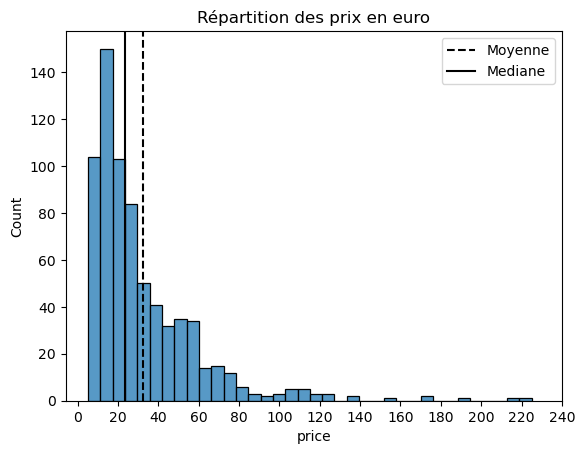

In [65]:
#Representation de la repartition des prix en histogramme:
mean = ca_par_produit["price"].mean()
median = ca_par_produit["price"].median()
sns.histplot(data=ca_par_produit["price"])
plt.xticks(range(0, int(max(ca_par_produit['price'])) + 20, 20))
plt.axvline(mean, color="black", linestyle="--")
plt.axvline(median, color="black", linestyle="-")
plt.legend({"Moyenne":mean,"Mediane":median})
plt.title("Répartition des prix en euro")

#Nous pouvons visualiser graphiquement toutes les informations mentionnées précédemment

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.2 - Analyse des outliers</h3>
</div>

In [66]:
#Détection des outliers par Z score

ecart_type = ca_par_produit['price'].std()
moyenne = ca_par_produit['price'].mean()

threshold = 2
outlier = []
for i in ca_par_produit['price']:
    z = (i-moyenne)/ecart_type
    if z > threshold:
        outlier.append(i)
        
print("Le nombre d'outlier est de :",len(outlier))        
print("Les prix sont :", outlier)

Le nombre d'outlier est de : 30
Les prix sont : [175.0, 112.0, 126.5, 225.0, 135.0, 109.6, 157.0, 108.5, 104.0, 176.0, 191.3, 105.6, 217.5, 116.4, 137.0, 102.3, 124.8, 99.0, 115.0, 121.0, 105.0, 105.0, 115.0, 121.0, 92.0, 114.0, 122.0, 93.0, 88.4, 100.0]


In [67]:
#Détection des outliers par l'écart interquartile

Q1 = ca_par_produit['price'].quantile(0.25)
Q3 = ca_par_produit['price'].quantile(0.75)
IQ = Q3 - Q1

# Calcul de la limite des outliers inférieur.
Limite_outlier_inférieur = Q1 - 1.5 * IQ
# Calcul de la limite des outliers supérieur.
Limite_outlier_supérieur = Q3 + 1.5 * IQ

# Prix en dessous de la limite.
Outlier_inférieur = ca_par_produit['price'] < Limite_outlier_inférieur
# Prix au dessus de la limite.
Outlier_supérieur = ca_par_produit['price'] > Limite_outlier_supérieur

print("La limite pour les outlier inferieurs :", round(Limite_outlier_inférieur,2),"\n")
print("Les index qui sont inferieurs aux outlier :\n", np.where(Outlier_inférieur)[0],"\n")

print("La limite pour les outlier superieurs :", round(Limite_outlier_supérieur,2),"\n")
print("Les index qui sont superieurs aux outlier :\n", np.where(Outlier_supérieur)[0],"\n")

print('Le nombre de valeur outlier est de :', ca_par_produit.loc[(ca_par_produit['price']>Limite_outlier_supérieur),'price'].count())
print("\n",ca_par_produit.loc[(ca_par_produit['price']>Limite_outlier_supérieur),('price','post_title')])

La limite pour les outlier inferieurs : -27.82 

Les index qui sont inferieurs aux outlier :
 [] 

La limite pour les outlier superieurs : 83.93 

Les index qui sont superieurs aux outlier :
 [ 62  83  85  87  91  93  98 170 196 197 199 200 205 208 209 246 249 250
 330 381 382 383 384 385 386 387 645 693 694 695 706 709] 

Le nombre de valeur outlier est de : 32

      price                                         post_title
62   175.0                Camille Giroud Clos de Vougeot 2016
83   112.0  Champagne Agrapart &amp; Fils L'Avizoise Extra...
85    86.8  Champagne Agrapart &amp; Fils Minéral Extra Br...
87   126.5     Champagne Egly-Ouriet Grand Cru Blanc de Noirs
91   225.0     Champagne Egly-Ouriet Grand Cru Millésimé 2008
93   135.0             Champagne Gosset Célébris Vintage 2007
98    85.6  Champagne Larmandier-Bernier Grand Cru Les Che...
170  109.6  Château de Meursault Puligny-Montrachet 1er Cr...
196  157.0  Cognac Frapin Château de Fontpinot 1989 20 Ans...
197  108.5   

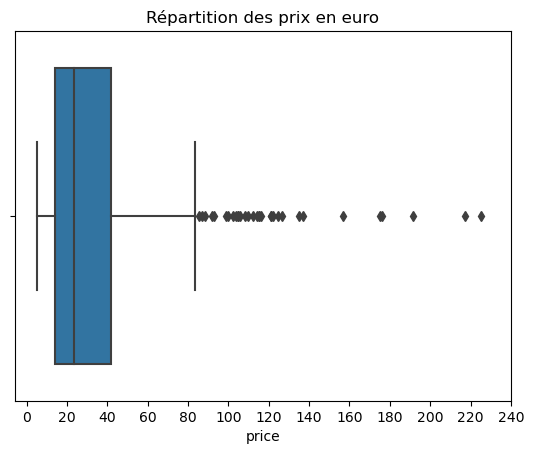

In [68]:
#Representation des outliers par le boxplot

sns.boxplot(x=ca_par_produit['price'])
plt.xticks(range(0, int(max(ca_par_produit['price'])) + 20, 20))
plt.title("Répartition des prix en euro")
plt.show()

#Nous pouvons constater avec ces différents résultats que les outliers sont essentiellements des Grand Cru et 1er Cru, nous compronnons la raison pour laquelle ces prix sont beaucoup plus élevés que la moyenne. Ces valeurs sont donc des valeurs atypiques mais non erronées. Leur valeur est justifiée 